#**Analysis on Online Retail Dataset**

#**3.0** **Installing and Importing Libraries**

 **3.1 Installing libraries**

In [ ]:
!pip install -q datascience                                         # A package that is required by pandas-profiling library
!pip install -q pandas-profiling                                    # A library to generate basic statistics about data

     |████████████████████████████████| 1.6 MB 31.1 MB/s 


**3.2** **Upgrading Libraries**

In [ ]:
!pip install -q --upgrade pandas-profiling

     |████████████████████████████████| 315 kB 20.0 MB/s 
     |████████████████████████████████| 9.9 MB 53.7 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 102 kB 65.2 MB/s 
     |████████████████████████████████| 690 kB 48.6 MB/s 
     |████████████████████████████████| 4.7 MB 68.5 MB/s 
     |████████████████████████████████| 296 kB 75.9 MB/s 


**3.3** **Importing Libraries**

In [ ]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Importing Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface of matplotlib
import seaborn as sns                                               # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go                                      # For interactive graphs
#-------------------------------------------------------------------------------------------------------------------------------
import datetime                                                     # For datetime operations
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

**4. Data Acquisition & Description**

In [ ]:
data = pd.read_excel(io='https://github.com/insaid2018/Term-1/blob/master/Data/Casestudy/online_retail.xlsx?raw=true')
print('Shape of the dataset:', data.shape)
data.head()

Shape of the dataset: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom


**4.1 Data Description**

In [ ]:
data.describe()


,Quantity,UnitPrice,CustomerID
count,541909.00000,541909.00000,406829.00000
mean,9.55225,4.61111,15287.69057
std,218.08116,96.75985,1713.60030
min,-80995.00000,-11062.06000,12346.00000
25%,1.00000,1.25000,13953.00000
50%,3.00000,2.08000,15152.00000
75%,10.00000,4.13000,16791.00000
max,80995.00000,38970.00000,18287.00000


**4.2 Data Information**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#**5.0 Data Pre-Profiling**

**5.1 Pre-Profiling report**

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Pre Profiling Report.html')
# print('Accomplished!')

#**6.0 Data Cleaning**

In [ ]:
# We will start by first removing the duplicate rows
data.drop_duplicates(inplace=True)

# Dropping rows containing missing values
data.dropna(inplace=True)

# Checking for missing values again
data.isna().sum()

# Extracting Year, Month, Day and Hour for every transaction
data['year'] = data['InvoiceDate'].dt.year
data['month'] = data['InvoiceDate'].dt.month
data['hour'] = data['InvoiceDate'].dt.hour

# We get Monday = 0 to Sunday = 6 when we convert to day of the week.
# We will add +1 to every day of week so we can get Monday = 1 to Sunday = 7
data['day'] = (data['InvoiceDate'].dt.dayofweek) + 1

data["Revenue"] = data["Quantity"] * data["UnitPrice"]

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,2010,12,8,3,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,2010,12,8,3,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000


#**7.0 Data Post-Profiling**

In [ ]:
# profile = ProfileReport(df = data)
# profile.to_file(output_file = 'Post Profiling Report.html')
# print('Accomplished!')

#**8.0 Exploratory Data Analysis**

**Question:** How to cerify for cancelled transactions?

In [ ]:
# Putting cancelled orders in a different dataframe for easier analysis
cancelled_orders = data[data['InvoiceNo'].astype(str).str.startswith('C')]

print('Total number of cancelled orders:',cancelled_orders.shape[0])
cancelled_orders.head()

Total number of cancelled orders: 8872


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50000,14527.00000,United Kingdom,2010,12,9,3,-27.50000
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65000,15311.00000,United Kingdom,2010,12,9,3,-4.65000
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65000,17548.00000,United Kingdom,2010,12,10,3,-19.80000
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29000,17548.00000,United Kingdom,2010,12,10,3,-6.96000
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29000,17548.00000,United Kingdom,2010,12,10,3,-6.96000


**Question:** Does the Quantity feature consists of negative values for cancelled orders?

In [ ]:
cancelled_orders[cancelled_orders['Quantity']>=0].shape

(0, 13)

In [ ]:
data[(data['Quantity']<0) & (data['InvoiceNo'] != data['InvoiceNo'].astype(str).str.startswith('C'))].shape

(8872, 13)

**Question:** How many total orders have been made?

In [ ]:
total = data['InvoiceNo'].nunique()
total

22190

**Question:** What is the proportion of cancelled transactions from total number of transactions?

In [ ]:
cancelled = cancelled_orders['InvoiceNo'].nunique()
print('Proportion of cancelled orders is: ' + str(cancelled*100/total) + '%')

Proportion of cancelled orders is: 16.466876971608833%


**Question :** What is the average number of orders placed per customer?

In [ ]:
groupby_customers = pd.DataFrame(data.groupby('CustomerID')['InvoiceNo'].nunique())
groupby_customers.head()

,InvoiceNo
CustomerID,
12346.00000,2
12347.00000,7
12348.00000,4
12349.00000,1
12350.00000,1


In [ ]:
groupby_customers.describe()

,InvoiceNo
count,4372.00000
mean,5.07548
std,9.33875
min,1.00000
25%,1.00000
50%,3.00000
75%,5.00000
max,248.00000


**Question:** What's the average number of unique items per order?

In [ ]:
groupby_invoice = pd.DataFrame(data.groupby(['InvoiceNo'])['StockCode'].nunique())
groupby_invoice.columns = ['Items']
groupby_invoice.head()

,Items
InvoiceNo,
536365,7
536366,2
536367,12
536368,4
536369,1


In [ ]:
groupby_invoice.describe()

,Items
count,22190.00000
mean,17.87657
std,22.87261
min,1.00000
25%,3.00000
50%,12.00000
75%,24.00000
max,541.00000


**Question:** How many products does a customer buy on an average?

In [ ]:
temp_df = data.groupby(['CustomerID'], as_index=False)['Quantity'].sum()
transaction_df = temp_df.rename(columns = {'Quantity':'Number of Products'})
transaction_df.head()

,CustomerID,Number of Products
0,12346.00000,0
1,12347.00000,2458
2,12348.00000,2341
3,12349.00000,631
4,12350.00000,197


In [ ]:
transaction_df.describe()

,CustomerID,Number of Products
count,4372.00000,4372.00000
mean,15299.67772,1119.13335
std,1722.39071,4672.99571
min,12346.00000,-303.00000
25%,13812.75000,151.75000
50%,15300.50000,364.00000
75%,16778.25000,956.25000
max,18287.00000,196719.00000


In [ ]:
transaction_df[transaction_df['Number of Products']==transaction_df['Number of Products'].min()]

,CustomerID,Number of Products
3103,16546.00000,-303


In [ ]:
data[data['CustomerID']==16546]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
3721,536663,22867,HAND WARMER BIRD DESIGN,24,2010-12-02 12:07:00,2.10000,16546.00000,United Kingdom,2010,12,12,4,50.40000
3722,536663,22633,HAND WARMER UNION JACK,24,2010-12-02 12:07:00,2.10000,16546.00000,United Kingdom,2010,12,12,4,50.40000
3723,536663,22632,HAND WARMER RED RETROSPOT,24,2010-12-02 12:07:00,2.10000,16546.00000,United Kingdom,2010,12,12,4,50.40000
3724,536663,22910,PAPER CHAIN KIT VINTAGE CHRISTMAS,40,2010-12-02 12:07:00,2.55000,16546.00000,United Kingdom,2010,12,12,4,102.00000
3725,536663,22737,RIBBON REEL CHRISTMAS PRESENT,20,2010-12-02 12:07:00,1.65000,16546.00000,United Kingdom,2010,12,12,4,33.00000
3726,536663,22952,60 CAKE CASES VINTAGE CHRISTMAS,24,2010-12-02 12:07:00,0.55000,16546.00000,United Kingdom,2010,12,12,4,13.20000
4853,C536812,22578,WOODEN STAR CHRISTMAS SCANDINAVIAN,-36,2010-12-02 16:58:00,0.85000,16546.00000,United Kingdom,2010,12,16,4,-30.60000
4854,C536812,22574,HEART WOODEN CHRISTMAS DECORATION,-192,2010-12-02 16:58:00,0.72000,16546.00000,United Kingdom,2010,12,16,4,-138.24000
4855,C536812,22593,CHRISTMAS GINGHAM STAR,-144,2010-12-02 16:58:00,0.72000,16546.00000,United Kingdom,2010,12,16,4,-103.68000
4856,C536812,22595,CHRISTMAS GINGHAM HEART,-144,2010-12-02 16:58:00,0.72000,16546.00000,United Kingdom,2010,12,16,4,-103.68000


In [ ]:
data[data['CustomerID']==16545]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
242034,558294,85152,HAND OVER THE CHOCOLATE SIGN,12,2011-06-28 10:37:00,2.10000,16545.00000,United Kingdom,2011,6,10,2,25.20000
242035,558294,21539,RED RETROSPOT BUTTER DISH,18,2011-06-28 10:37:00,4.25000,16545.00000,United Kingdom,2011,6,10,2,76.50000
242036,558294,79321,CHILLI LIGHTS,48,2011-06-28 10:37:00,4.95000,16545.00000,United Kingdom,2011,6,10,2,237.60000


In [ ]:
data[data['StockCode']==21539]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
4418,536782,21539,RED RETROSPOT BUTTER DISH,3,2010-12-02 15:18:00,4.95000,17567.00000,United Kingdom,2010,12,15,4,14.85000
4997,536836,21539,RED RETROSPOT BUTTER DISH,3,2010-12-02 18:08:00,4.95000,18168.00000,United Kingdom,2010,12,18,4,14.85000
6537,536947,21539,RED RETROSPOT BUTTER DISH,3,2010-12-03 12:29:00,4.95000,13013.00000,United Kingdom,2010,12,12,5,14.85000
7132,536989,21539,RED RETROSPOT BUTTER DISH,1,2010-12-03 15:10:00,4.95000,17238.00000,United Kingdom,2010,12,15,5,4.95000
7921,537065,21539,RED RETROSPOT BUTTER DISH,3,2010-12-05 11:57:00,4.95000,12567.00000,France,2010,12,11,7,14.85000
8218,537130,21539,RED RETROSPOT BUTTER DISH,1,2010-12-05 12:23:00,4.95000,17796.00000,United Kingdom,2010,12,12,7,4.95000
9698,537211,21539,RED RETROSPOT BUTTER DISH,3,2010-12-05 15:18:00,4.95000,16143.00000,United Kingdom,2010,12,15,7,14.85000
9842,537219,21539,RED RETROSPOT BUTTER DISH,2,2010-12-05 15:47:00,4.95000,14081.00000,United Kingdom,2010,12,15,7,9.90000
9844,537219,21539,RED RETROSPOT BUTTER DISH,1,2010-12-05 15:47:00,4.95000,14081.00000,United Kingdom,2010,12,15,7,4.95000
18169,537802,21539,RED RETROSPOT BUTTER DISH,3,2010-12-08 13:11:00,4.95000,13455.00000,United Kingdom,2010,12,13,3,14.85000


In [ ]:
transaction_df[transaction_df['Number of Products']<0].shape[0]

40

In [ ]:
transaction_df[transaction_df['Number of Products']<0].shape[1]

2

**Question:** What is the total revenue generated by the online retailer?

In [ ]:
data["Revenue"] = data["Quantity"] * data["UnitPrice"]
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,2010,12,8,3,15.30000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,2010,12,8,3,22.00000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000


In [ ]:
print('Total revenue generated by the online retailer is:', round(data['Revenue'].sum(), 2))

Total revenue generated by the online retailer is: 8278519.42


**Question:** What is the average revenue generated per customer?

In [ ]:
avg_revenue = pd.DataFrame(data.groupby('CustomerID')['Revenue'].mean())
avg_revenue.columns = ['Average Revenue']
avg_revenue.head()

,Average Revenue
CustomerID,
12346.00000,0.00000
12347.00000,23.68132
12348.00000,57.97548
12349.00000,24.07603
12350.00000,19.67059


In [ ]:
avg_revenue.describe()

,Average Revenue
count,4372.00000
mean,28.86839
std,127.32472
min,-4287.63000
25%,11.06662
50%,16.94102
75%,23.58143
max,3861.00000


**Question:** What is the total revenue generated by each country?

In [ ]:
country_revenue = pd.DataFrame(data.groupby(by='Country', as_index=False)['Revenue'].sum().sort_values(by='Revenue', ascending = False))
country_revenue.head()

,Country,Revenue
35,United Kingdom,6747156.15400
23,Netherlands,284661.54000
10,EIRE,250001.78000
14,Germany,221509.47000
13,France,196626.05000


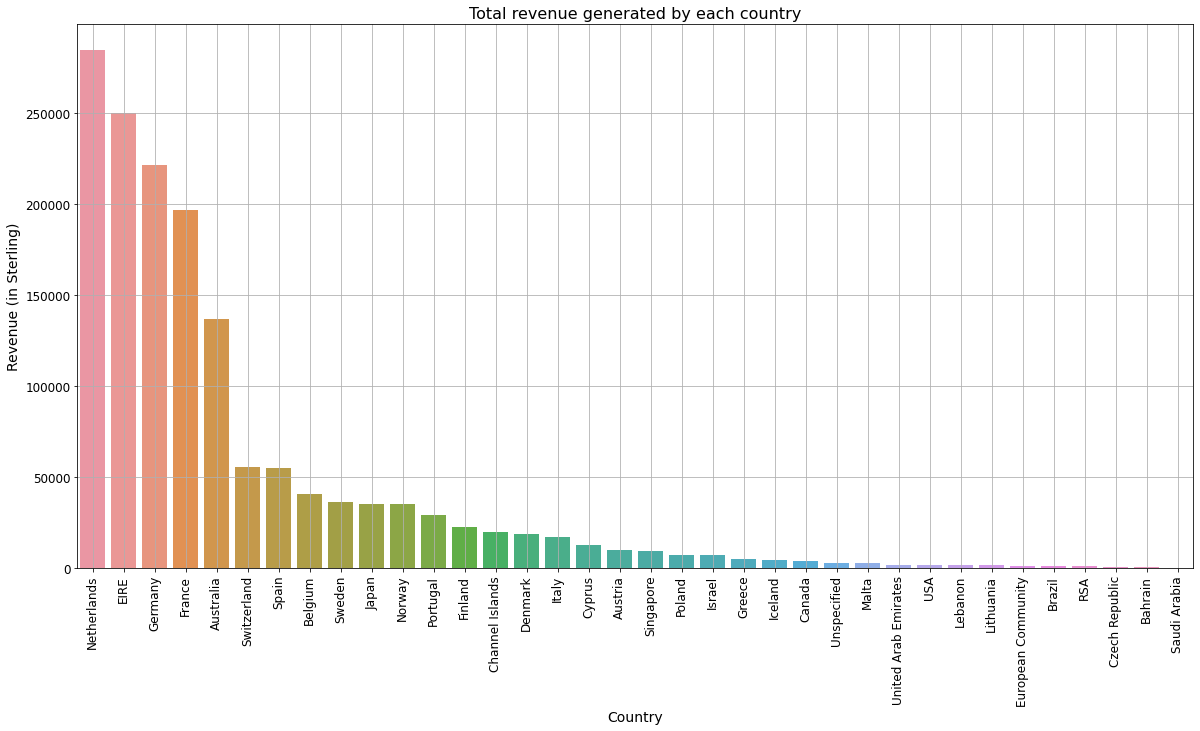

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(20, 10))

# Creating a barplot for country vs revenue
sns.barplot(x=country_revenue['Country'][1:], y=country_revenue['Revenue'][1:])

# Adding Cosmetics
plt.xlabel(xlabel='Country', fontsize=14)
plt.ylabel(ylabel='Revenue (in Sterling)', fontsize=14)
plt.title(label='Total revenue generated by each country', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Question:** What is the customer distribution across each country?

In [ ]:
# We will count the unique number of CustomerIDs across each country
country_customers = pd.DataFrame(data.groupby(by='Country', as_index=False)['CustomerID'].nunique())
country_customers.rename(columns={'CustomerID': 'No. of Customers'}, inplace=True)
country_customers.sort_values(by=['No. of Customers'], ascending = False, inplace=True)
country_customers.head()

,Country,No. of Customers
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25


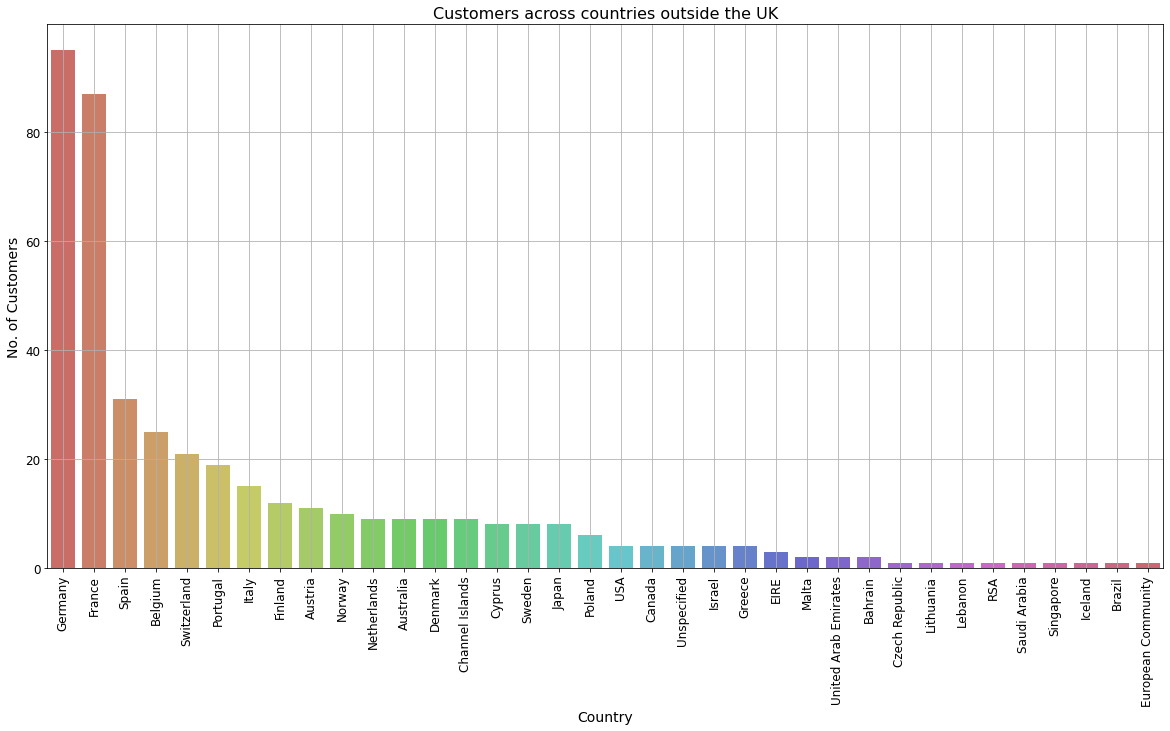

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(20, 10))

# Creating a barplot for country vs revenue
sns.barplot(x=country_customers['Country'][1:], y=country_customers['No. of Customers'][1:], palette='hls')

# Adding Cosmetics
plt.xlabel(xlabel='Country', fontsize=14)
plt.ylabel(ylabel='No. of Customers', fontsize=14)
plt.title(label='Customers across countries outside the UK', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Display the plot
plt.show()

**Question:** What is the total revenue generated per month?

In [ ]:
data['InvoiceYearMonth'] = data['InvoiceDate'].map(lambda date: str(date.year) + '-' + str(date.month))
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55000,17850.00000,United Kingdom,2010,12,8,3,15.30000,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75000,17850.00000,United Kingdom,2010,12,8,3,22.00000,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39000,17850.00000,United Kingdom,2010,12,8,3,20.34000,2010-12


In [ ]:
df_revenue = data.groupby(['InvoiceYearMonth']).agg({'Revenue': sum}).reset_index().sort_values(by=['Revenue'], ascending = False)
df_revenue.head()

,InvoiceYearMonth,Revenue
3,2011-11,1126815.07000
2,2011-10,973306.38000
12,2011-9,929356.23200
8,2011-5,647011.67000
11,2011-8,615078.09000


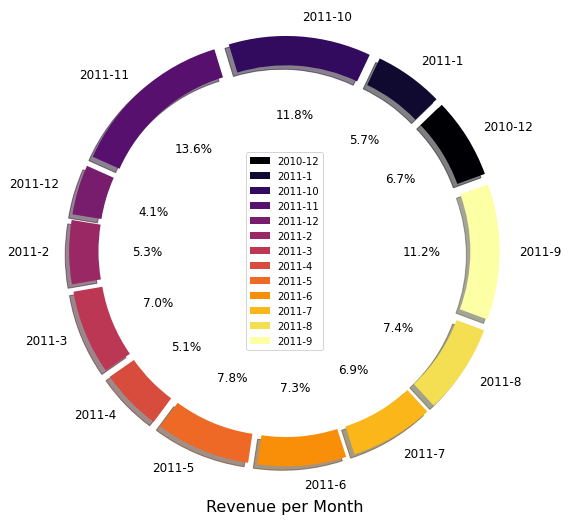

In [ ]:
# Creating a pie plot for revenue per month
df_revenue.groupby(['InvoiceYearMonth'])['Revenue'].mean().plot(kind='pie',
                                                                autopct='%3.1f%%',
                                                                wedgeprops=dict(width=0.15), 
                                                                explode=np.ones(13)/10,
                                                                figsize=(9, 9),
                                                                fontsize=12, 
                                                                startangle=20,
                                                                shadow=True,
                                                                cmap='inferno',
                                                                legend=True,
                                                                label='')

# Adding some cosmetics
plt.xlabel(xlabel='Revenue per Month', fontsize=16)

# Display the output
plt.show()

**Question:** How many orders have been placed at each hour of a day?

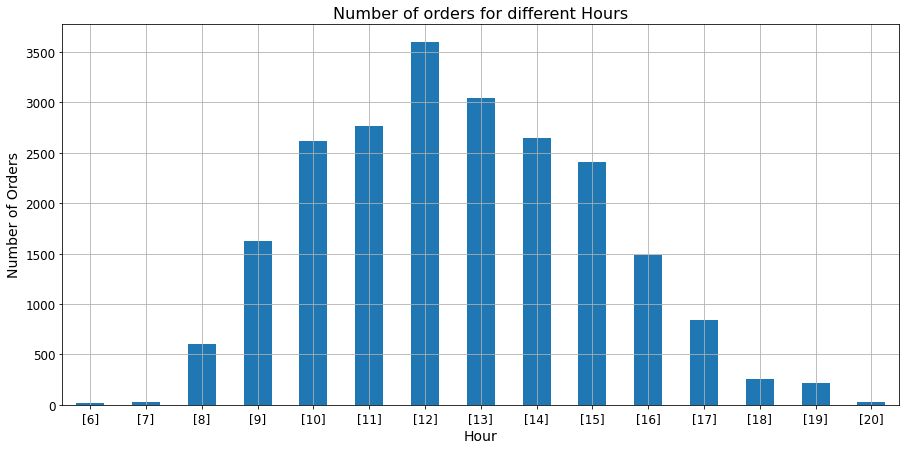

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(15,7))

# Create a bar plot
hour_data = data.groupby('InvoiceNo')['hour'].unique()
hour_data.value_counts().iloc[:-1].sort_index().plot(kind='bar')

# Adding Cosmetics
plt.xlabel(xlabel='Hour', fontsize=14)
plt.ylabel(ylabel='Number of Orders', fontsize=14)
plt.title(label='Number of orders for different Hours', fontsize=16)
plt.xticks(rotation='horizontal', fontsize=12)
#plt.xticks(labels=range(6, 21), rotation='horizontal', fontsize=12)
plt.yticks(ticks=range(0, 4000, 500), fontsize=12)
plt.grid(b=True)

# Displaying the plot
plt.show()

**Question:** What is the frequency of orders for weekdays?

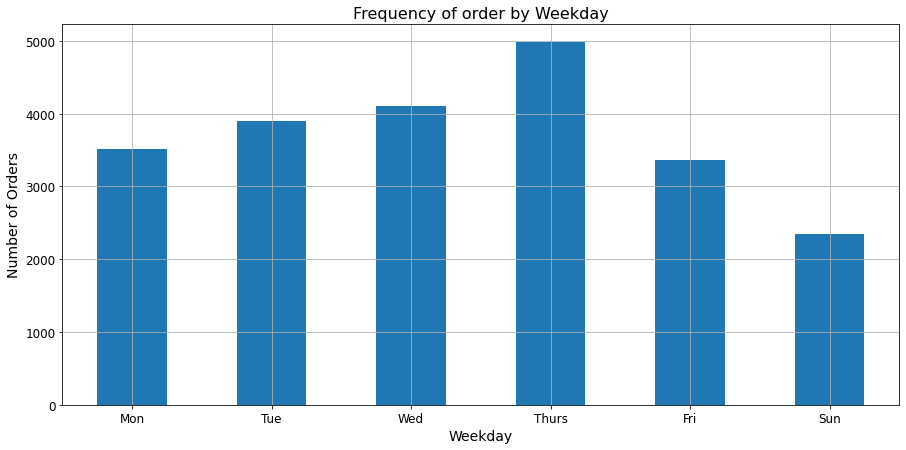

In [ ]:
fig = plt.figure(figsize=(15,7))

# Create a bar plot
week_data = data.groupby(['InvoiceNo'])['day'].unique()
week_data.value_counts().sort_index().plot.bar()

# Adding Cosmetics
plt.xlabel('Weekday',fontsize=14)
plt.ylabel('Number of Orders',fontsize=14)
plt.title("Frequency of order by Weekday", fontsize=16)
plt.xticks(ticks=[[0], [1], [2], [3], [4], [5]],
           labels=['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sun'],
           rotation='horizontal',
           fontsize=12)
plt.yticks(ticks=range(0, 5500, 1000), fontsize=12)
plt.grid(b=True)

# Displaying the plot
plt.show()

**Question:** What is the frequency of orders for weekdays vs hours per day?

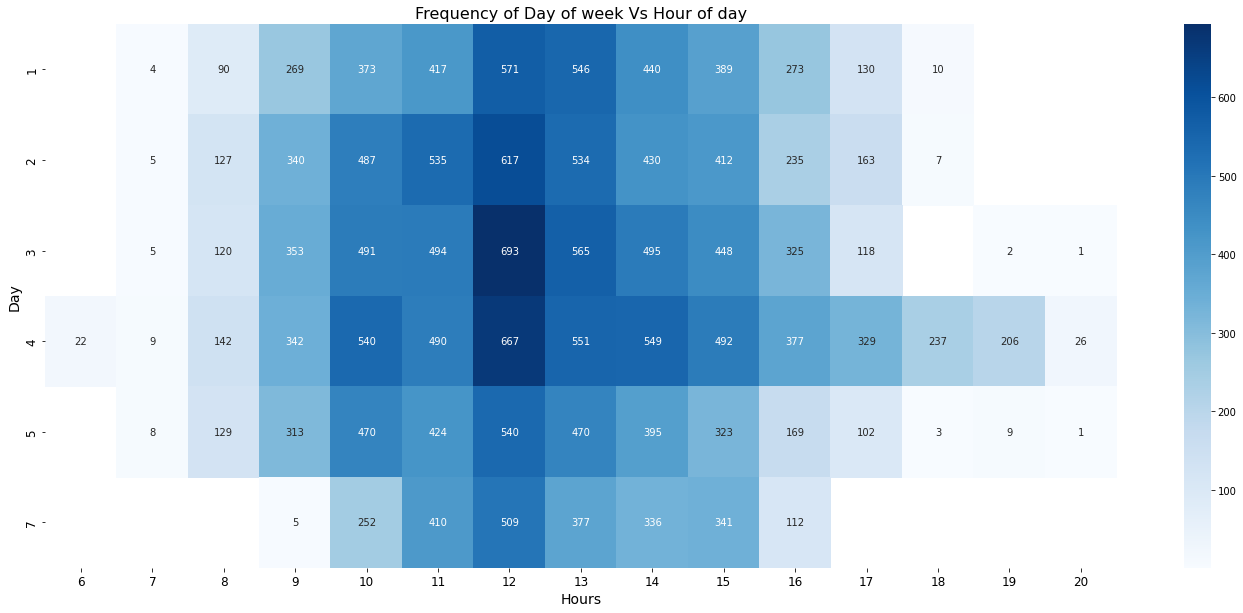

In [ ]:
plt.figure(figsize=(24, 10))

# Creating a group and sorting unique values for invoice numbers
grouped_df  = data.groupby(["day", "hour"])["InvoiceNo"].unique().reset_index()

# Calculating number of orders for every hour of every day
grouped_df["number_of_orders"] = grouped_df["InvoiceNo"].apply(len)

# Creating a pivot table from the grouped_df
grouped_df = grouped_df.pivot('day', 'hour', 'number_of_orders')

# Create a heatmap
sns.heatmap(data=grouped_df, annot=True, cmap='Blues', fmt='g')

# Adding some cosmetics
plt.title(label="Frequency of Day of week Vs Hour of day", fontsize=16, y=1.02)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel(xlabel='Hours', fontsize=14)
plt.ylabel(ylabel='Day', fontsize=14)
#plt.grid(b=True)

# Display the heatmap
plt.show()

**Question:** Assuming UnitPrice=0 means free items, how many free items have been given away?

In [ ]:
free = data[data['UnitPrice'] == 0]
free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue,InvoiceYearMonth
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.00000,12647.00000,Germany,2010,12,14,7,0.00000,2010-12
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.00000,16560.00000,United Kingdom,2010,12,14,4,0.00000,2010-12
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.00000,14911.00000,EIRE,2010,12,13,2,0.00000,2010-12
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.00000,13081.00000,United Kingdom,2011,1,16,4,0.00000,2011-1
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.00000,13081.00000,United Kingdom,2011,1,16,4,0.00000,2011-1


In [ ]:
free = data[data['UnitPrice'] == 1]
free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue,InvoiceYearMonth
10113,537225,M,Manual,1,2010-12-05 16:41:00,1.00000,12748.00000,United Kingdom,2010,12,16,7,1.00000,2010-12
115319,546117,M,Manual,12,2011-03-09 13:56:00,1.00000,16771.00000,United Kingdom,2011,3,13,3,12.00000,2011-3
130294,547444,POST,POSTAGE,1,2011-03-23 10:55:00,1.00000,12811.00000,Portugal,2011,3,10,3,1.00000,2011-3
142718,548631,M,Manual,1,2011-04-01 12:24:00,1.00000,13184.00000,United Kingdom,2011,4,12,5,1.00000,2011-4
142866,548648,22558,CLOTHES PEGS RETROSPOT PACK 24,12,2011-04-01 13:20:00,1.00000,12949.00000,United Kingdom,2011,4,13,5,12.00000,2011-4


In [ ]:
free = data[data['UnitPrice'] == 5]
free.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,hour,day,Revenue,InvoiceYearMonth
29558,538807,M,Manual,1,2010-12-14 12:06:00,5.00000,17194.00000,United Kingdom,2010,12,12,2,5.00000,2010-12
100501,544819,M,Manual,6,2011-02-23 17:15:00,5.00000,12748.00000,United Kingdom,2011,2,17,3,30.00000,2011-2
159057,550322,22846,BREAD BIN DINER STYLE RED,1,2011-04-17 12:53:00,5.00000,14524.00000,United Kingdom,2011,4,12,7,5.00000,2011-4
170946,551351,85152,HAND OVER THE CHOCOLATE SIGN,24,2011-04-28 10:20:00,5.00000,14298.00000,United Kingdom,2011,4,10,4,120.00000,2011-4
194137,553551,22423,REGENCY CAKESTAND 3 TIER,20,2011-05-17 16:23:00,5.00000,13631.00000,United Kingdom,2011,5,16,2,100.00000,2011-5


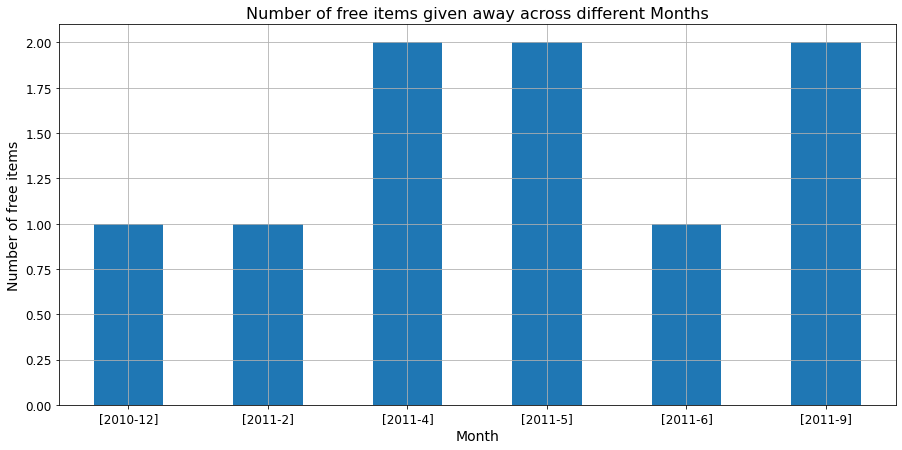

In [ ]:
# Create a 15x7 inches figure
fig = plt.figure(figsize=(15,7))

# Create a bar plot by:
# Grouping data by InvoiceNo
# Calculating unique months in the groupby object and taking their counts
# Sorting their index and plotting

free_month_data = free.groupby('InvoiceNo')['InvoiceYearMonth'].unique()
free_month_data.value_counts().sort_index().plot(kind='bar')

# Adding Cosmetics
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of free items', fontsize=14)
plt.title('Number of free items given away across different Months', fontsize=16)
plt.xticks(rotation='horizontal',
           fontsize=12)
plt.yticks(fontsize=12)
plt.grid(b=True)

# Displaying the plot
plt.show()

**Question:** What is the average revenue per order?

In [ ]:
avg_revenue_per_order = data.groupby('InvoiceNo')['Revenue'].mean().reset_index()
avg_revenue_per_order.head()

,InvoiceNo,Revenue
0,536365,19.87429
1,536366,11.10000
2,536367,23.22750
3,536368,17.51250
4,536369,17.85000


In [ ]:
avg_revenue_per_order.describe()

,Revenue
count,22190.00000
mean,34.38573
std,1809.76532
min,-168469.60000
25%,5.95881
50%,16.75605
75%,27.21063
max,168469.60000


**Question:** What is the total monthly revenue in UK?

In [ ]:
df_uk = data.query("Country == 'United Kingdom'").reset_index(drop=True)

In [ ]:
df_monthly_revenue = df_uk.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
df_monthly_revenue

,InvoiceYearMonth,Revenue
3,2011-11,950731.45000
2,2011-10,781610.92000
12,2011-9,774620.30200
8,2011-5,524363.88000
0,2010-12,481675.23000
11,2011-8,475752.95000
9,2011-6,471386.36000
10,2011-7,460082.89100
6,2011-3,455534.07000
7,2011-4,375919.23100


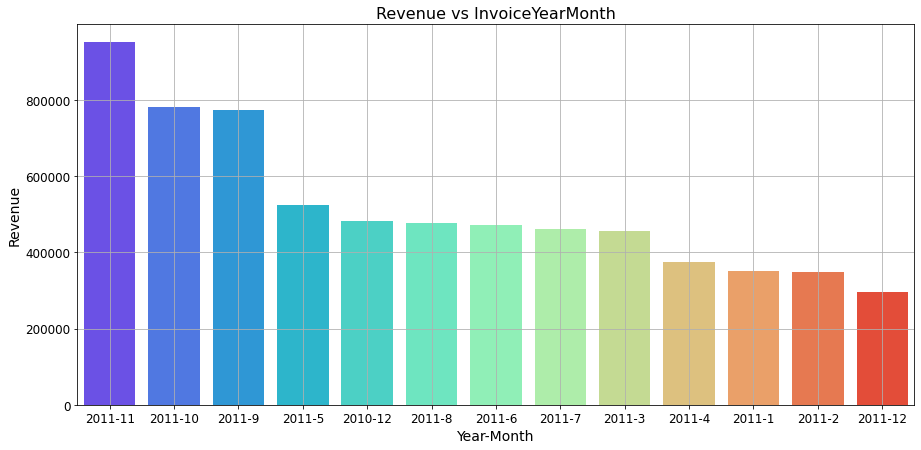

In [ ]:
plt.figure(figsize=(15,7))

# Plot a barplot for month vs revenue for the UK
sns.barplot(data=df_monthly_revenue, x='InvoiceYearMonth', y='Revenue', palette='rainbow')

# Adding some cosmetics
plt.xlabel(xlabel='Year-Month', fontsize=14)
plt.ylabel(ylabel='Revenue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Revenue vs InvoiceYearMonth', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Question:** Which products are most bought in UK?

In [ ]:
groupedProduct = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
top_10_products = groupedProduct.head(10)
top_10_products

,StockCode,Description,Quantity
2694,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,47886
3562,85099B,JUMBO BAG RED RETROSPOT,40777
2800,84879,ASSORTED COLOUR BIRD ORNAMENT,32580
3569,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32079
1032,22197,POPCORN HOLDER,28550
1427,22616,PACK OF 12 LONDON TISSUES,24297
37,17003,BROCADE RING PURSE,22672
356,21212,PACK OF 72 RETROSPOT CAKE CASES,22182
1012,22178,VICTORIAN GLASS HANGING T-LIGHT,21427
851,21977,PACK OF 60 PINK PAISLEY CAKE CASES,19882


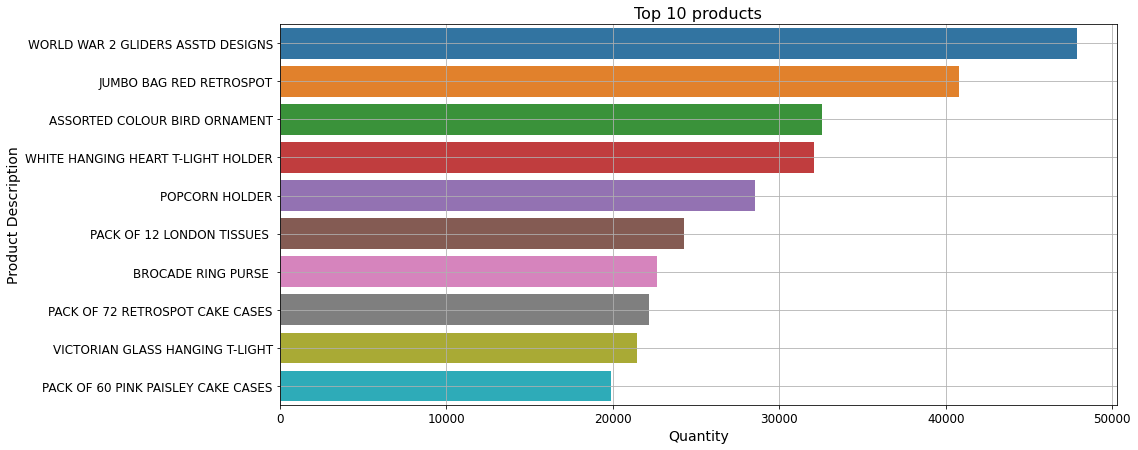

In [ ]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot a bar plot for top 10 Product names and their quantities
sns.barplot(data=top_10_products, y='Description', x='Quantity')

# Adding some cosmetics
plt.ylabel(ylabel='Product Description', fontsize=14)
plt.xlabel(xlabel='Quantity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Top 10 products', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()

**Question:** How many customers were active in all the months in the UK?

In [ ]:
df_monthly_active = df_uk.groupby('InvoiceYearMonth')['CustomerID'].nunique().reset_index()

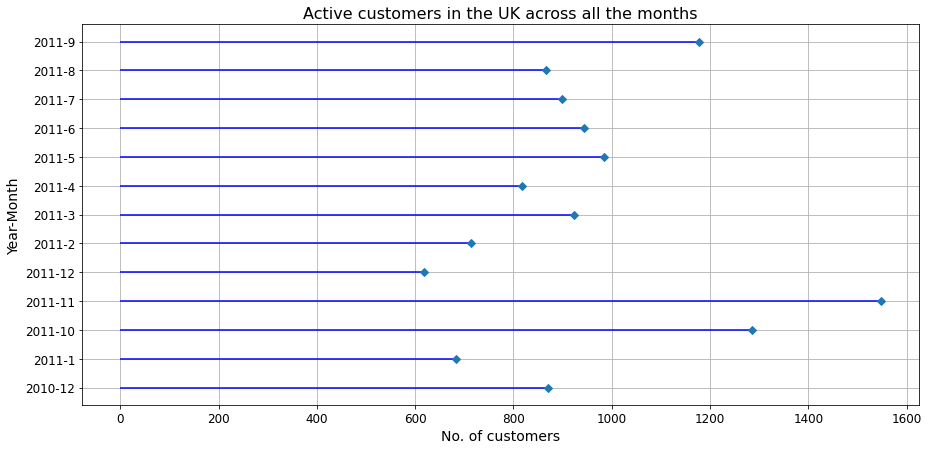

In [ ]:
# Create a figure of 15 x 7 inches
plt.figure(figsize=(15,7))

# Plot 
plt.hlines(df_monthly_active['InvoiceYearMonth'],xmin=0,xmax=df_monthly_active['CustomerID'],color='blue')
plt.plot(df_monthly_active['CustomerID'],df_monthly_active['InvoiceYearMonth'] , "D")

# Adding some cosmetics
plt.xlabel(xlabel='No. of customers', fontsize=14)
plt.ylabel(ylabel='Year-Month', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title(label='Active customers in the UK across all the months', fontsize=16)
plt.grid(b=True)

# Display the plot
plt.show()